# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST Digit Regognizer Data

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [6]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight','nine']

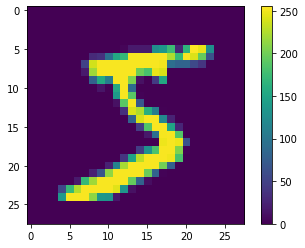

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing
The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Building the Model
Now it's time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

# Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2629 - accuracy: 0.9241
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1142 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0765 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0565 - accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0431 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0340 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0273 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0177 - accuracy: 0.9949
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.014

# Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9757
Test accuracy: 0.9757000207901001


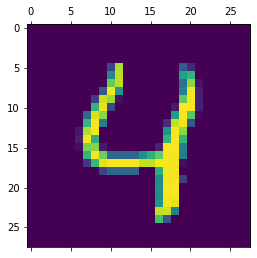

In [16]:
plt.matshow(test_images[4])
plt.show()

# Making Predictions

In [17]:
predictions = model.predict(test_images)

In [18]:
predictions[0]

array([4.8292237e-10, 4.7173161e-11, 1.5359056e-07, 5.1772076e-06,
       8.2444083e-13, 5.9840715e-08, 7.2909621e-16, 9.9998367e-01,
       1.5082972e-07, 1.0820957e-05], dtype=float32)

In [19]:
np.argmax(predictions[0])

7

In [20]:
test_labels[0]

7

Pick a number: 4


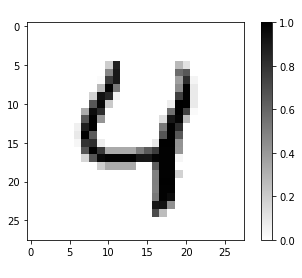

In [25]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight','nine']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]

    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()
def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
            else:
                print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)